In [1]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path
# Carregar los datosc simulados
file_path = Path('../data/raw/simulated_data.json')
if file_path.exists():
    with open('../data/raw/simulated_data.json') as f:
        data = [json.loads(line) for line in f]
else:
    print(file_path.resolve())


In [3]:
df = pl.DataFrame(data)
print(df.head())

shape: (5, 7)
┌─────────────────┬───────────┬───────────┬────────────┬─────────────┬────────────────┬────────────┐
│ timestamp       ┆ cpu_usage ┆ ram_usage ┆ disk_usage ┆ temperature ┆ network_latenc ┆ error_code │
│ ---             ┆ ---       ┆ ---       ┆ ---        ┆ ---         ┆ y              ┆ ---        │
│ str             ┆ f64       ┆ f64       ┆ f64        ┆ f64         ┆ ---            ┆ str        │
│                 ┆           ┆           ┆            ┆             ┆ f64            ┆            │
╞═════════════════╪═══════════╪═══════════╪════════════╪═════════════╪════════════════╪════════════╡
│ 2025-04-16T15:2 ┆ 40.93     ┆ 46.14     ┆ 53.9       ┆ 31.29       ┆ 128.85         ┆ OK         │
│ 6:28.663236     ┆           ┆           ┆            ┆             ┆                ┆            │
│ 2025-04-16T15:2 ┆ 78.92     ┆ 37.04     ┆ 40.69      ┆ 72.89       ┆ 127.04         ┆ OK         │
│ 6:33.668343     ┆           ┆           ┆            ┆             ┆       

In [20]:
df = df.with_columns([
    pl.col("timestamp")
    .str.strptime(pl.Datetime, "%Y-%m-%dT%H:%M:%S%.f")
    .alias("timestamp_parsed")
])

# Descripcion  estadistica basica
print(df.select([
    pl.col("cpu_usage").mean().alias("CPU mitjana"),
    pl.col("ram_usage").mean().alias("RAM mitjana"),
    pl.col("temperature").max().alias("Temperatura màxima"),
    pl.col("network_latency").min().alias("Latència mínima")
]))


shape: (1, 4)
┌─────────────┬─────────────┬────────────────────┬─────────────────┐
│ CPU mitjana ┆ RAM mitjana ┆ Temperatura màxima ┆ Latència mínima │
│ ---         ┆ ---         ┆ ---                ┆ ---             │
│ f64         ┆ f64         ┆ f64                ┆ f64             │
╞═════════════╪═════════════╪════════════════════╪═════════════════╡
│ 52.8425     ┆ 55.740833   ┆ 84.77              ┆ 23.95           │
└─────────────┴─────────────┴────────────────────┴─────────────────┘


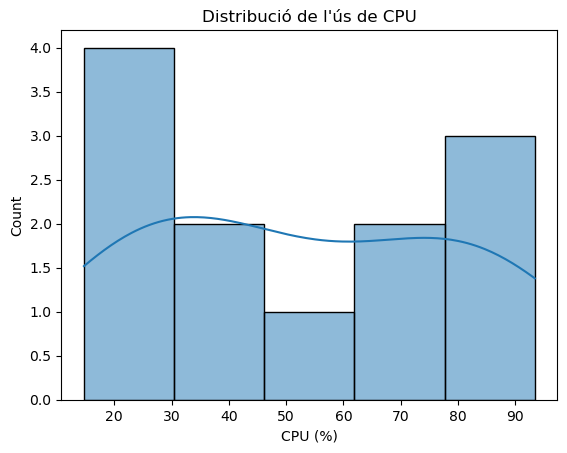

In [21]:
# Convertir a Pandas pera la visualitzacion con seaborn
pdf = df.to_pandas()

# Grafico de distribucion de CPU
sns.histplot(pdf["cpu_usage"], kde=True)
plt.title("Distribució de l'ús de CPU")
plt.xlabel("CPU (%)")
plt.show()

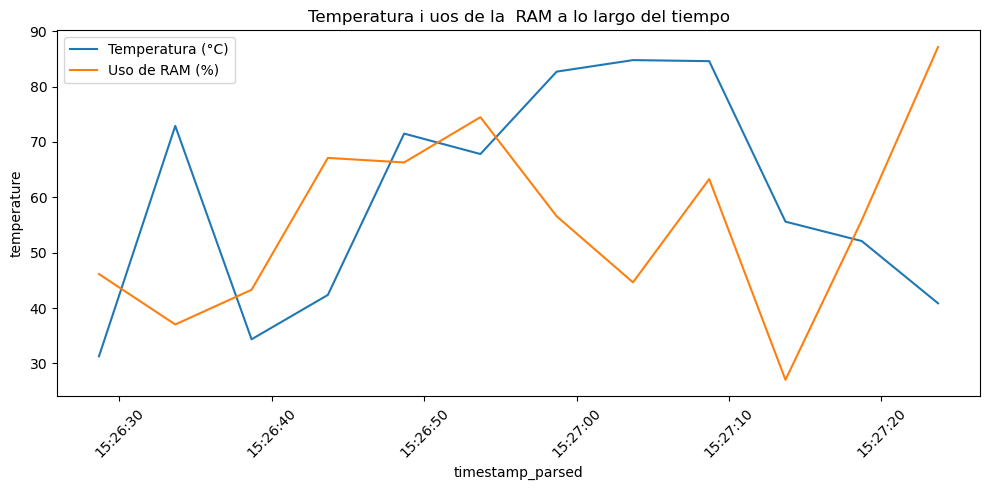

In [22]:
# Grafico de lineas para la temperatura i uso de la RAM
plt.figure(figsize=(10, 5))
sns.lineplot(x="timestamp_parsed", y="temperature", data=pdf, label="Temperatura (°C)")
sns.lineplot(x="timestamp_parsed", y="ram_usage", data=pdf, label="Uso de RAM (%)")
plt.xticks(rotation=45)
plt.title("Temperatura i uos de la  RAM a lo largo del tiempo")
plt.legend()
plt.tight_layout()
plt.show()

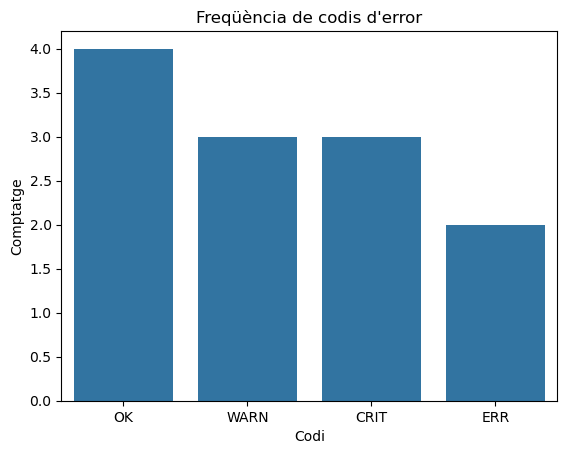

In [ ]:
# contage para codi d'error
sns.countplot(x="error_code", data=pdf)
plt.title("Freqüència de codis d'error")
plt.xlabel("Codi")
plt.ylabel("Contage")
plt.show()